In [29]:
#pip install shap

In [30]:
import time 
import shap 
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
df = pd.read_csv(r"C:\Users\Kanishk Goyal\OneDrive - IIT Kanpur\Desktop\Prof. Hamim Zafar\Data\Final Data\Urad\Urad_MH.csv")
df = df.drop(columns=['latitude','longitude','DistrictName', 'year'])
# df = df.sample(frac=1).reset_index(drop=True)
#df = df.drop(columns=['DistrictName','latitude','longitude','year','year_mask'])

In [32]:
# cat_cols = ['DistrictName', 'year']
# # Label encode categorical columns
# encoder = LabelEncoder()
# df[cat_cols] = df[cat_cols].apply(encoder.fit_transform)

In [33]:
df.columns

Index(['stl1_7', 'stl1_8', 'stl1_9', 'stl1_10', 'stl2_7', 'stl2_8', 'stl2_9',
       'stl2_10', 'stl3_7', 'stl3_8', 'stl3_9', 'stl3_10', 'stl4_7', 'stl4_8',
       'stl4_9', 'stl4_10', 'swvl1_7', 'swvl1_8', 'swvl1_9', 'swvl1_10',
       'swvl2_8', 'swvl2_9', 'swvl2_7', 'swvl2_10', 'swvl3_9', 'swvl3_10',
       'swvl3_7', 'swvl3_8', 'swvl4_7', 'swvl4_8', 'swvl4_9', 'swvl4_10',
       'ssr_10', 'ssr_9', 'ssr_7', 'ssr_8', 'u10_9', 'u10_10', 'u10_7',
       'u10_8', 'v10_7', 'v10_8', 'v10_9', 'v10_10', 'tmax_7', 'tmax_8',
       'tmax_9', 'tmax_10', 'tmin_7', 'tmin_8', 'tmin_9', 'tmin_10', 'rain_7',
       'rain_8', 'rain_9', 'rain_10', 'countrain_7', 'countrain_8',
       'countrain_9', 'countrain_10', 'rh_7', 'rh_8', 'rh_9', 'rh_10',
       'Yield(tonnes/hectare)'],
      dtype='object')

In [34]:
df = df.drop(columns=['stl2_7','stl2_8', 'stl2_9', 'stl2_10', 'stl3_7', 'stl3_8', 'stl3_9', 'stl3_10'])

In [35]:
df = df.rename(columns={'Yield(tonnes/hectare)':'Yield(Tonnes/Hectare)'},inplace=False)
df = df.dropna(subset=['Yield(Tonnes/Hectare)'])

In [36]:
Q1 = df['Yield(Tonnes/Hectare)'].quantile(0.25)
Q3 = df['Yield(Tonnes/Hectare)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['Yield_no_outliers'] = np.where((df['Yield(Tonnes/Hectare)'] < lower_bound) | (df['Yield(Tonnes/Hectare)'] > upper_bound), np.nan, df['Yield(Tonnes/Hectare)'])

num_points_after_handling_outliers = df['Yield_no_outliers'].count()
print("Number of points in the final DataFrame after handling outliers:", num_points_after_handling_outliers)

Number of points in the final DataFrame after handling outliers: 742


In [37]:
df = df.dropna(subset=['Yield_no_outliers'])
df = df.drop(columns=['Yield(Tonnes/Hectare)'])

In [38]:
df.rename(columns={'Yield_no_outliers': 'Yield(Tonnes/Hectare)'}, inplace=True)

In [39]:
df.columns

Index(['stl1_7', 'stl1_8', 'stl1_9', 'stl1_10', 'stl4_7', 'stl4_8', 'stl4_9',
       'stl4_10', 'swvl1_7', 'swvl1_8', 'swvl1_9', 'swvl1_10', 'swvl2_8',
       'swvl2_9', 'swvl2_7', 'swvl2_10', 'swvl3_9', 'swvl3_10', 'swvl3_7',
       'swvl3_8', 'swvl4_7', 'swvl4_8', 'swvl4_9', 'swvl4_10', 'ssr_10',
       'ssr_9', 'ssr_7', 'ssr_8', 'u10_9', 'u10_10', 'u10_7', 'u10_8', 'v10_7',
       'v10_8', 'v10_9', 'v10_10', 'tmax_7', 'tmax_8', 'tmax_9', 'tmax_10',
       'tmin_7', 'tmin_8', 'tmin_9', 'tmin_10', 'rain_7', 'rain_8', 'rain_9',
       'rain_10', 'countrain_7', 'countrain_8', 'countrain_9', 'countrain_10',
       'rh_7', 'rh_8', 'rh_9', 'rh_10', 'Yield(Tonnes/Hectare)'],
      dtype='object')

In [40]:
for i in range(1, 2):
    df[f'stl{i}'] = df[[f'stl{i}_{j}' for j in range(7, 11)]].mean(axis=1)
for i in range(4, 5):
    df[f'stl{i}'] = df[[f'stl{i}_{j}' for j in range(7, 11)]].mean(axis=1)

for i in range(1, 5):
    df[f'swvl{i}'] = df[[f'swvl{i}_{j}' for j in range(7, 11)]].mean(axis=1)

df['u10'] = (df['u10_7'] + df['u10_8'] + df['u10_9'] + df['u10_10'])/4
df['v10'] = (df['v10_7'] + df['v10_8'] + df['v10_9'] + df['v10_10'])/4
df['ssr'] = (df['ssr_7'] + df['ssr_8'] + df['ssr_9'] + df['ssr_10'])/4
df['rh'] = (df['rh_7'] + df['rh_8'] + df['rh_9'] + df['rh_10'])/4

df['rain'] = (df['rain_7'] + df['rain_8'] + df['rain_9'] + df['rain_10'])/4
df['tmax'] = (df['tmax_7'] + df['tmax_8'] + df['tmax_9'] + df['tmax_10'])/4
df['tmin'] = (df['tmin_7'] + df['tmin_8'] + df['tmin_9'] + df['tmin_10'])/4
df['countrain'] = df['countrain_7'] + df['countrain_8'] + df['countrain_9'] + df['countrain_10']

In [41]:
df.columns

Index(['stl1_7', 'stl1_8', 'stl1_9', 'stl1_10', 'stl4_7', 'stl4_8', 'stl4_9',
       'stl4_10', 'swvl1_7', 'swvl1_8', 'swvl1_9', 'swvl1_10', 'swvl2_8',
       'swvl2_9', 'swvl2_7', 'swvl2_10', 'swvl3_9', 'swvl3_10', 'swvl3_7',
       'swvl3_8', 'swvl4_7', 'swvl4_8', 'swvl4_9', 'swvl4_10', 'ssr_10',
       'ssr_9', 'ssr_7', 'ssr_8', 'u10_9', 'u10_10', 'u10_7', 'u10_8', 'v10_7',
       'v10_8', 'v10_9', 'v10_10', 'tmax_7', 'tmax_8', 'tmax_9', 'tmax_10',
       'tmin_7', 'tmin_8', 'tmin_9', 'tmin_10', 'rain_7', 'rain_8', 'rain_9',
       'rain_10', 'countrain_7', 'countrain_8', 'countrain_9', 'countrain_10',
       'rh_7', 'rh_8', 'rh_9', 'rh_10', 'Yield(Tonnes/Hectare)', 'stl1',
       'stl4', 'swvl1', 'swvl2', 'swvl3', 'swvl4', 'u10', 'v10', 'ssr', 'rh',
       'rain', 'tmax', 'tmin', 'countrain'],
      dtype='object')

In [42]:
columns=['stl1','stl4','swvl1','swvl2','swvl3','swvl4','ssr','rh','u10','v10','rain','tmax','tmin','countrain','Yield(Tonnes/Hectare)']
df = df[columns]

In [43]:
df.shape

(742, 15)

In [44]:
df = df.sample(frac=1).reset_index(drop=True)

In [45]:
X = df.drop('Yield(Tonnes/Hectare)', axis=1)  # Features
y = df['Yield(Tonnes/Hectare)']  # Target variable

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [47]:
# import time
# def print_accuracy(f):
#     print(
#         f"Root mean squared test error = {np.sqrt(np.mean((f(X_test) - y_test) ** 2))}"
#     )
#     time.sleep(0.5)  # to let the print get out before any progress bars

# from sklearn.ensemble import RandomForestRegressor
# rforest = RandomForestRegressor(
#     n_estimators=1000, max_depth=None, min_samples_split=2, random_state=0
# )
# rforest.fit(X_train, y_train)
# print_accuracy(rforest.predict)
# y_pred = rforest.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# print("mse",mse,"/n","r2",r2)

In [48]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
#model = xgb.XGBRegressor(objective="reg:squarederror")
model = RandomForestRegressor(n_estimators=1000, max_depth=None, min_samples_split=2, random_state=0)
model.fit(X,y)

RandomForestRegressor(n_estimators=1000, random_state=0)

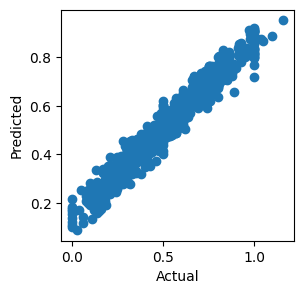

In [49]:
y_pred = model.predict(X)
plt.figure(figsize=(3,3))
plt.scatter(y,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [50]:
import shap

# Assuming 'model' is your trained regression model and 'X' is your feature matrix
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X)


In [51]:
features = X.columns.tolist()

In [52]:
X.shape

(742, 14)

In [53]:
X.head(3)

,stl1,stl4,swvl1,swvl2,swvl3,swvl4,ssr,rh,u10,v10,rain,tmax,tmin,countrain
0,26.557219,29.050756,0.437369,0.436431,0.419321,0.370707,1.283576e+07,77.552135,1.813446,-0.159121,6.104289,31.305282,23.139429,56
1,24.531990,26.224529,0.449095,0.453777,0.456396,0.455255,1.261114e+07,83.799444,2.329643,0.209432,5.355840,29.878790,22.545182,52
2,25.695244,28.570034,0.359846,0.381453,0.395298,0.357460,1.292793e+07,76.426861,2.816385,0.465621,4.552594,30.668689,21.371950,37


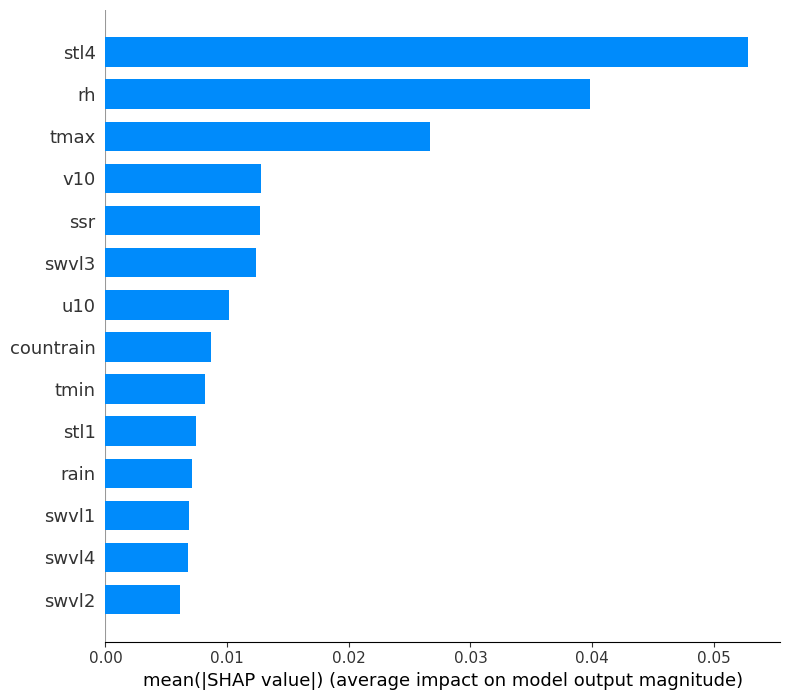

In [54]:
shap.summary_plot(shap_values, X_train, feature_names=features, plot_type="bar")

In [55]:
# for idx in range(50):  # Loop through indexes from 0 to 49
#     shap.dependence_plot(idx, shap_values, X, feature_names=features)

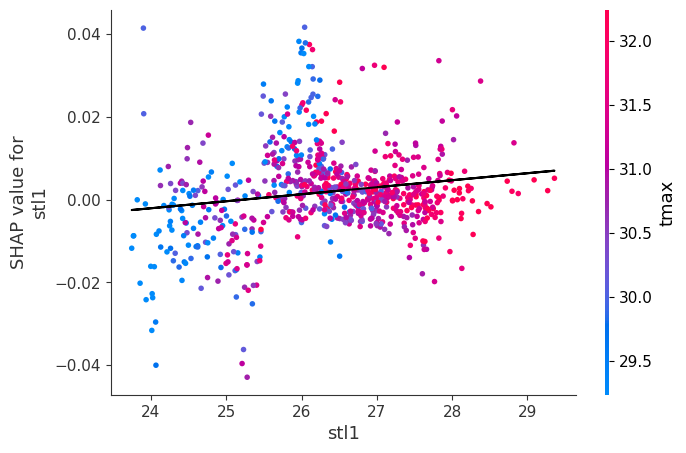

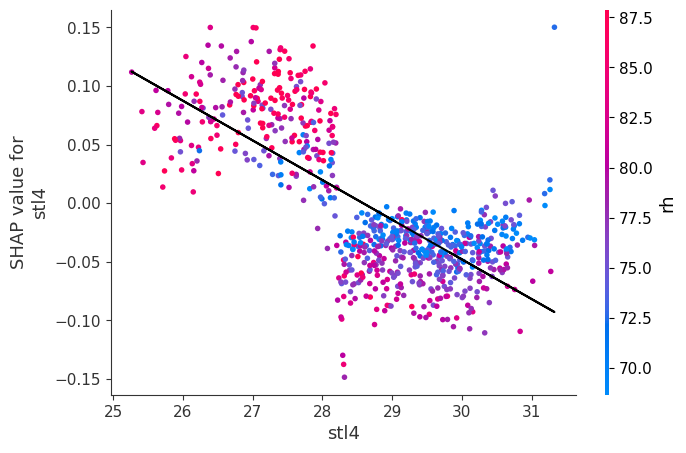

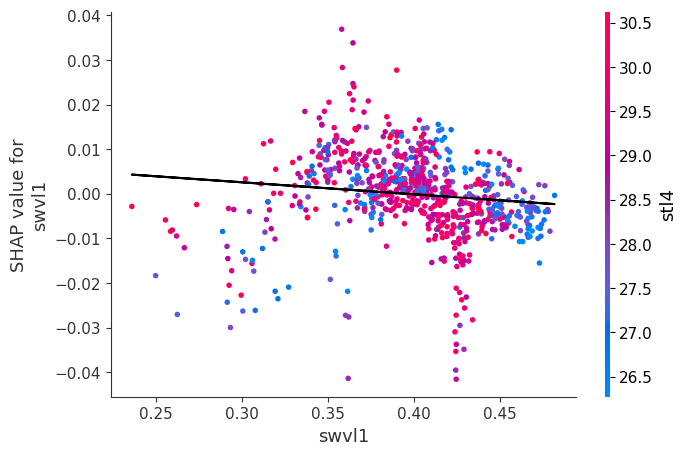

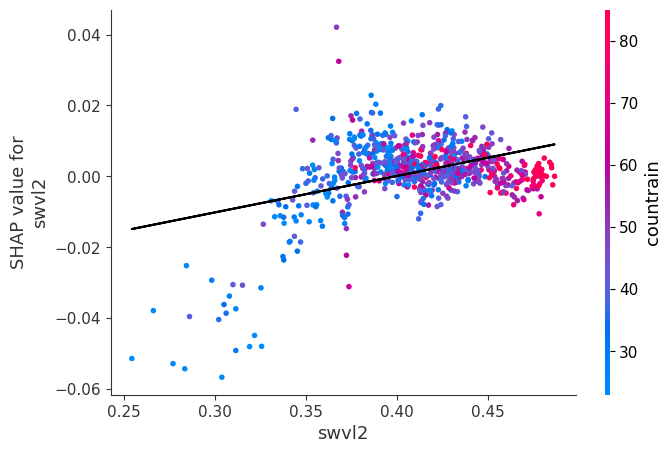

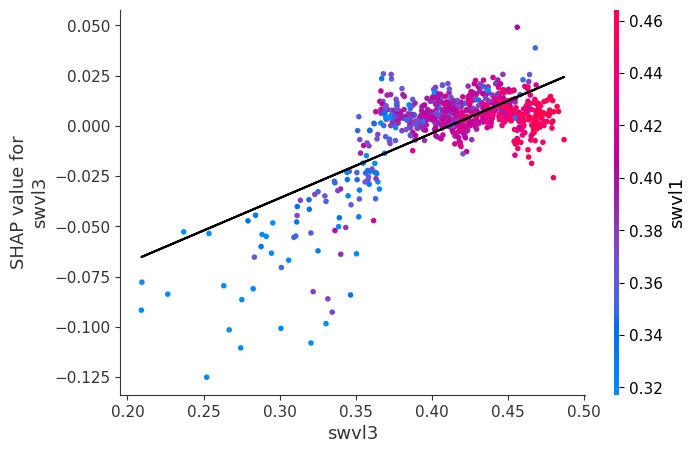

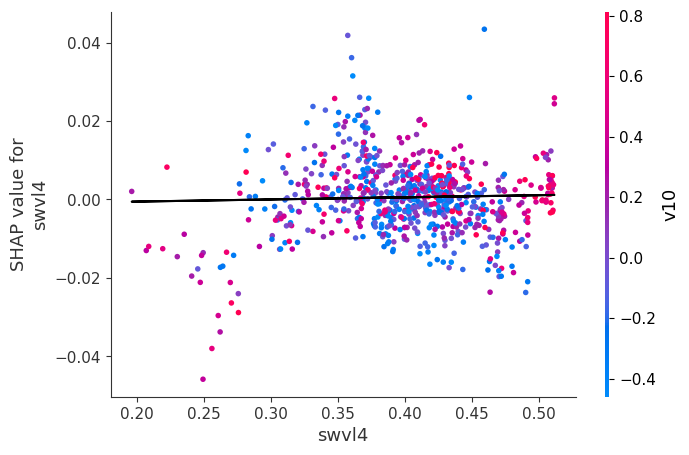

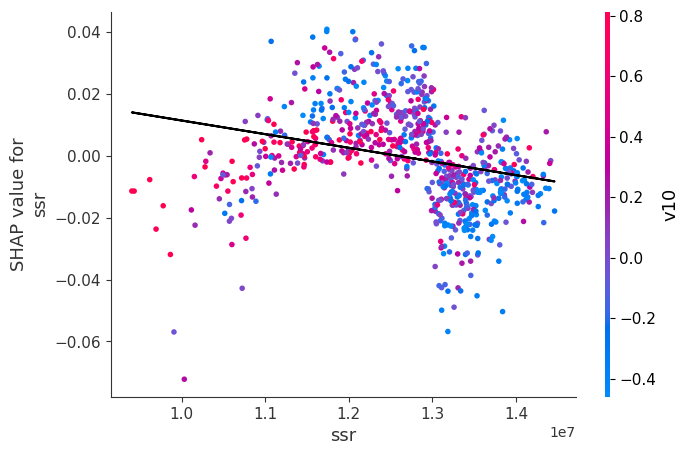

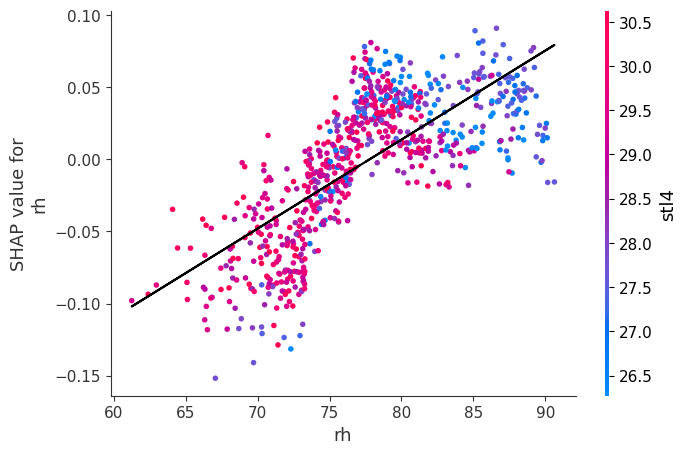

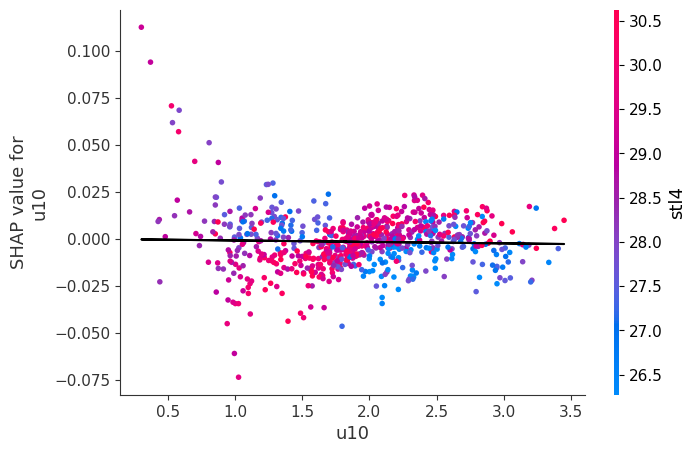

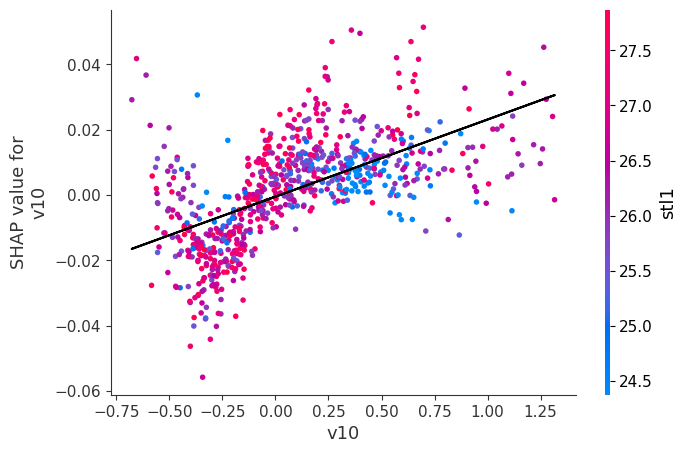

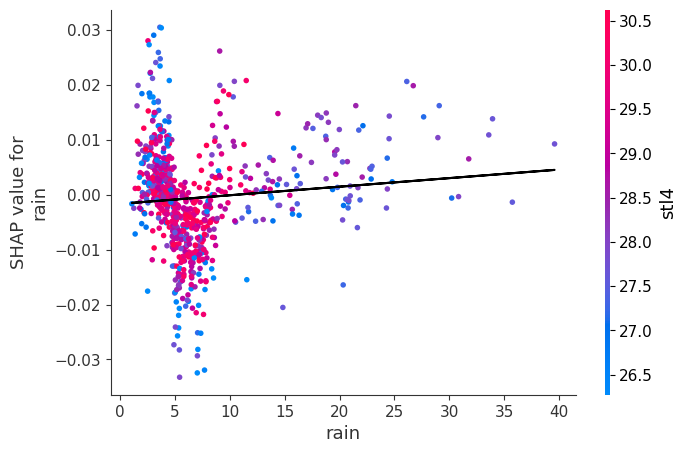

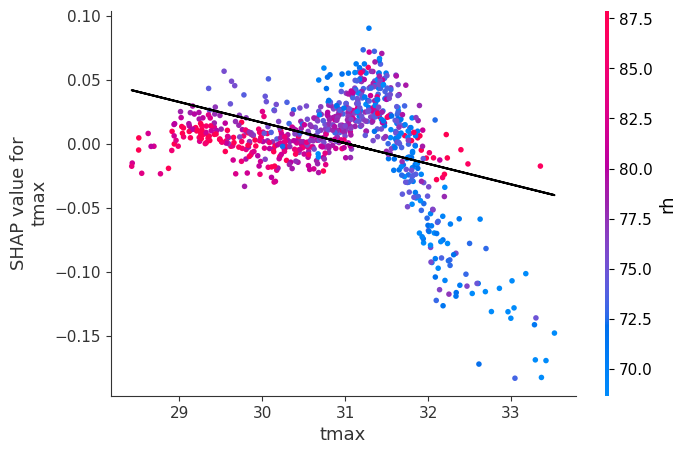

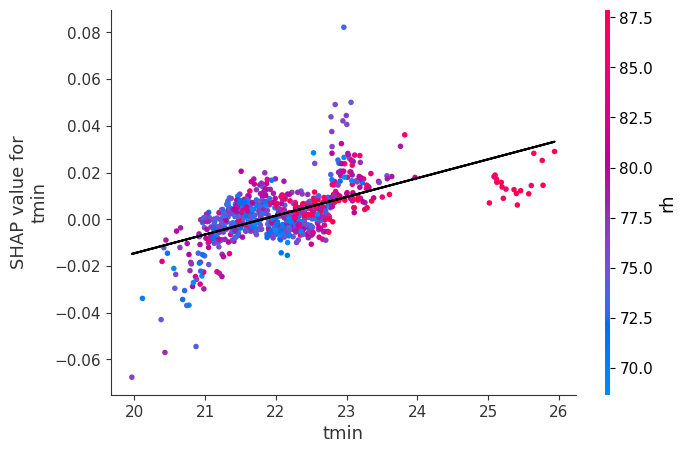

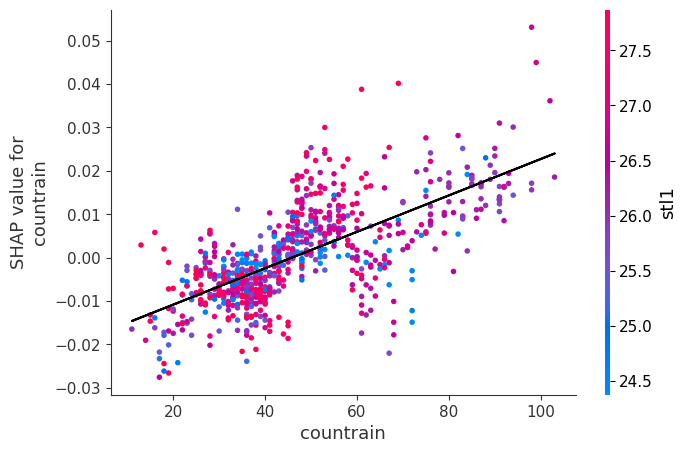

IndexError: index 14 is out of bounds for axis 1 with size 14

In [56]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Assuming shap_values and X are defined
# features is assumed to be a list containing the names of the features

for idx in range(100):  # Loop through indexes from 0 to 49
    shap.dependence_plot(idx, shap_values, X, feature_names=features, show=False)
    
    # Extract data for current feature
    if isinstance(X, np.ndarray):
        x_values = X[:, idx]
    else:  # Assuming X is a DataFrame
        x_values = X.iloc[:, idx]
    
    y_values = shap_values[:, idx]
    
    # Calculate best fit line
    coef = np.polyfit(x_values, y_values, 1)
    poly1d_fn = np.poly1d(coef)
    
    # Plot best fit line
    plt.plot(x_values, poly1d_fn(x_values), color='black')
    plt.show()


In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Assuming shap_values and X are defined
# features is assumed to be a list containing the names of the features

for idx in range(100):  # Loop through indexes from 0 to 99
    shap.dependence_plot(idx, shap_values, X, feature_names=features, show=False)
    
    # Extract data for current feature
    if isinstance(X, np.ndarray):
        x_values = X[:, idx]
    else:  # Assuming X is a DataFrame
        x_values = X.iloc[:, idx]
    
    y_values = shap_values[:, idx]
    
    # Calculate best fit curve
    # Change 2 to a higher number for higher-order polynomials
    order = 2
    coef = np.polyfit(x_values, y_values, order)
    poly_fn = np.poly1d(coef)
    
    # Generate x values for plotting the curve
    x_curve = np.linspace(np.min(x_values), np.max(x_values), 500)
    y_curve = poly_fn(x_curve)
    
    # Plot best fit curve
    plt.plot(x_curve, y_curve, color='black')
    plt.show()


In [ ]:
stop

In [ ]:
X.columns

In [ ]:
stop

In [ ]:
expected_value = explainer.expected_value

In [ ]:
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")

In [ ]:
select = range(50)
features = X.iloc[select]

In [ ]:
shap.decision_plot(expected_value, shap_values, features)

In [ ]:
shap.decision_plot(explainer.expected_value[0], shap_values[0], feature_names = list(features))

In [ ]:
from IPython.display import display

In [ ]:
explanation = explainer(X)

In [ ]:
# shap.initjs()
# shap.plots.force(explanation[0:500], plot_cmap="DrDb")

In [ ]:
# visualize the first 5 predictions explanations with a dark red dark blue color map.
shap.force_plot(explainer.expected_value, shap_values[0:1,:], X_test[0:1,:], plot_cmap="DrDb", feature_names=features)

In [ ]:
stop

In [ ]:
shap.summary_plot(shap_values, X, max_display=50)

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
import seaborn as sns


# Set Seaborn style
sns.set_style("whitegrid")

features = list(range(50))
display = PartialDependenceDisplay.from_estimator(model, X, features)

plt.gcf().set_size_inches(100, 500)  # Adjust the size as needed
plt.show()

In [ ]:
explainer = shap.Explainer(model)
shap_values = explainer(X)

In [ ]:
np.shape(shap_values.values)

In [ ]:
# shap.plots.waterfall(shap_values[0])

In [ ]:
# shap.initjs()
# shap.plots.force(shap_values)

In [ ]:
shap.plots.bar(shap_values, max_display=50)

In [ ]:
shap.plots.violin(shap_values, features=X,plot_type = 'layered_violin', max_display=50)

In [ ]:
shap.plots.bar(shap_values.cohorts(2).abs.mean(0))

In [ ]:
stop

In [ ]:
a = df['swvl1']
b = df['Yield(Tonnes/Hectare)']
slope, intercept = np.polyfit(a,b, 1)

# Calculate the best-fit line
best_fit_line = slope * a + intercept

# Plot the scatter plot and the best-fit line
plt.scatter(a, b, label='Data points')
plt.plot(a, best_fit_line, color='red', label='Best-fit line')
plt.xlabel('swvl1')
plt.ylabel('Yield(Tonnes/Hectare)')
plt.title('Scatter Plot with Best-fit Line')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# explain all the predictions in the test set
explainer = shap.TreeExplainer(rforest)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

In [ ]:
shap.dependence_plot("rh_3", shap_values, X)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X)